In [3]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA

In [4]:
songs = pd.read_csv("spotify-2023.csv", encoding='latin1')
songs

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


## Cleaning NaN values (for now)
#### 'in_shazam_charts' changed to zero
#### 'key' changed to "N/A"

In [5]:
songs['in_shazam_charts'] = songs['in_shazam_charts'].fillna(0)
songs['key'] = songs['key'].fillna("N/A")

print(songs.isnull().sum())
##print(songs.dtypes)

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


### Needed to remove commas in columns before converting to numeric

In [6]:
songs['in_deezer_playlists'] = songs['in_deezer_playlists'].astype(str)
songs['in_deezer_playlists'] = songs['in_deezer_playlists'].str.replace(',','')
songs['in_deezer_playlists'] = pd.to_numeric(songs['in_deezer_playlists'])

songs['in_shazam_charts'] = songs['in_shazam_charts'].astype(str)
songs['in_shazam_charts'] = songs['in_shazam_charts'].str.replace(',','')
songs['in_shazam_charts'] = pd.to_numeric(songs['in_shazam_charts'])


songs.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int64
in_deezer_charts         int64
in_shazam_charts         int64
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

#### convert 'streams' to numeric

In [7]:
songs_cleaned = pd.to_numeric(songs['streams'], errors='coerce')
songs['streams'] = songs_cleaned
songs['streams'].isnull().sum()

1

#### drop rows that have NaN number of streams and convert to int32

In [8]:
songs = songs.dropna(subset=['streams'])
songs['streams'].isnull().sum()


0

In [9]:
songs.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts          int64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

## Outliers

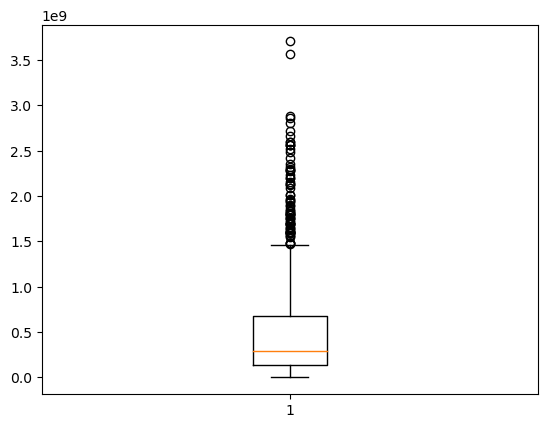

In [10]:
plt.boxplot(songs['streams'])
plt.show()

In [11]:
from scipy import stats

z_scores = stats.zscore(songs['streams'])
outliers = songs[abs(z_scores) > 3]
outliers.sort_values(by='streams', ascending=False)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2.713922e+09,433,...,104,C#,Major,77,36,63,1,0,36,5
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2.665344e+09,492,...,170,C#,Major,59,48,76,4,0,10,5
140,Believer,Imagine Dragons,1,2017,1,31,18986,23,2.594040e+09,250,...,125,A#,Minor,77,74,78,4,0,23,11
725,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2.591224e+09,315,...,95,G#,Major,75,64,52,41,0,11,3
48,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2.565530e+09,281,...,186,G,Major,68,49,59,16,0,13,28


## drop outliers from data

In [12]:
songs = songs[np.abs(stats.zscore(songs['streams'])) < 3]
songs

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5


### Field name changes

In [13]:
songs.rename(columns={'artist(s)_name':"artists_name"}, inplace=True)
songs.rename(columns={'key':"songkey"}, inplace=True)
songs

,track_name,artists_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,songkey,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5


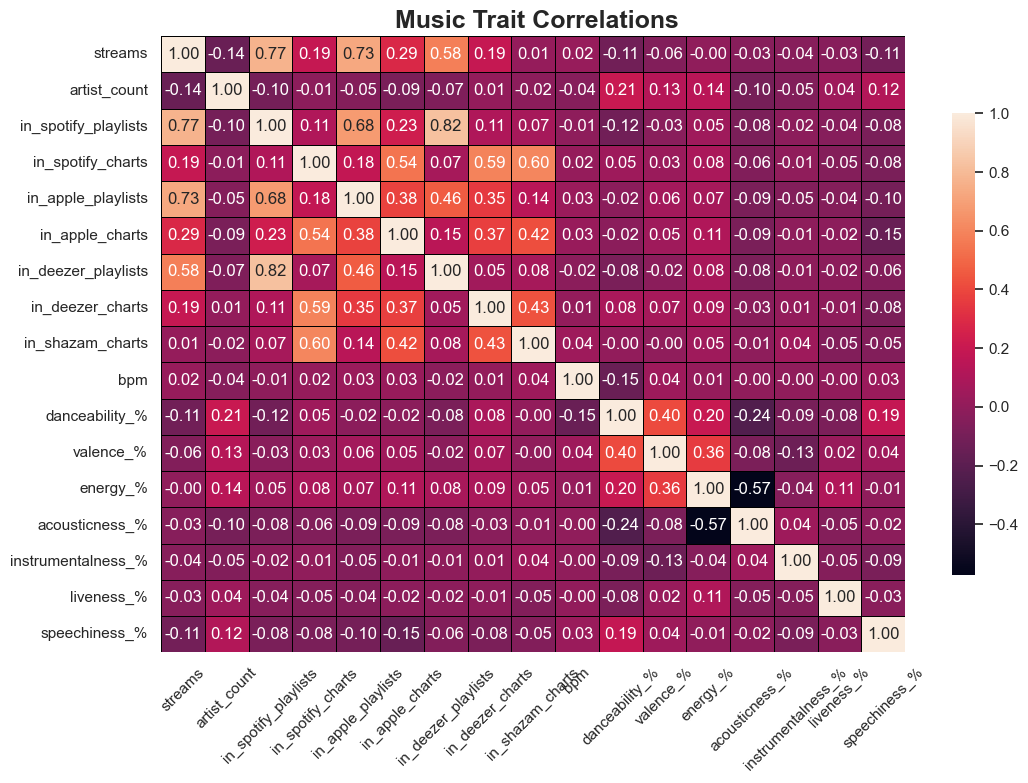

In [14]:
features = songs[['streams' , 'artist_count','in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists','in_deezer_charts','in_shazam_charts','bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
c_m = features.corr()

plt.figure(figsize=(12, 8))
sns.set(style='white')
sns.heatmap(c_m, annot=True, fmt=".2f", linewidths=0.4, linecolor='black', cbar=True, cbar_kws={'shrink': 0.75})
plt.title(' Music Trait Correlations', fontsize=18, fontweight='bold')

plt.xticks(rotation=45)

plt.show()

## it looks like streaming platform metrics generally have a stronger positive relationship with Streams
## namely, 'in_spotify_playlists' and 'in_deezer_playlists'
## 

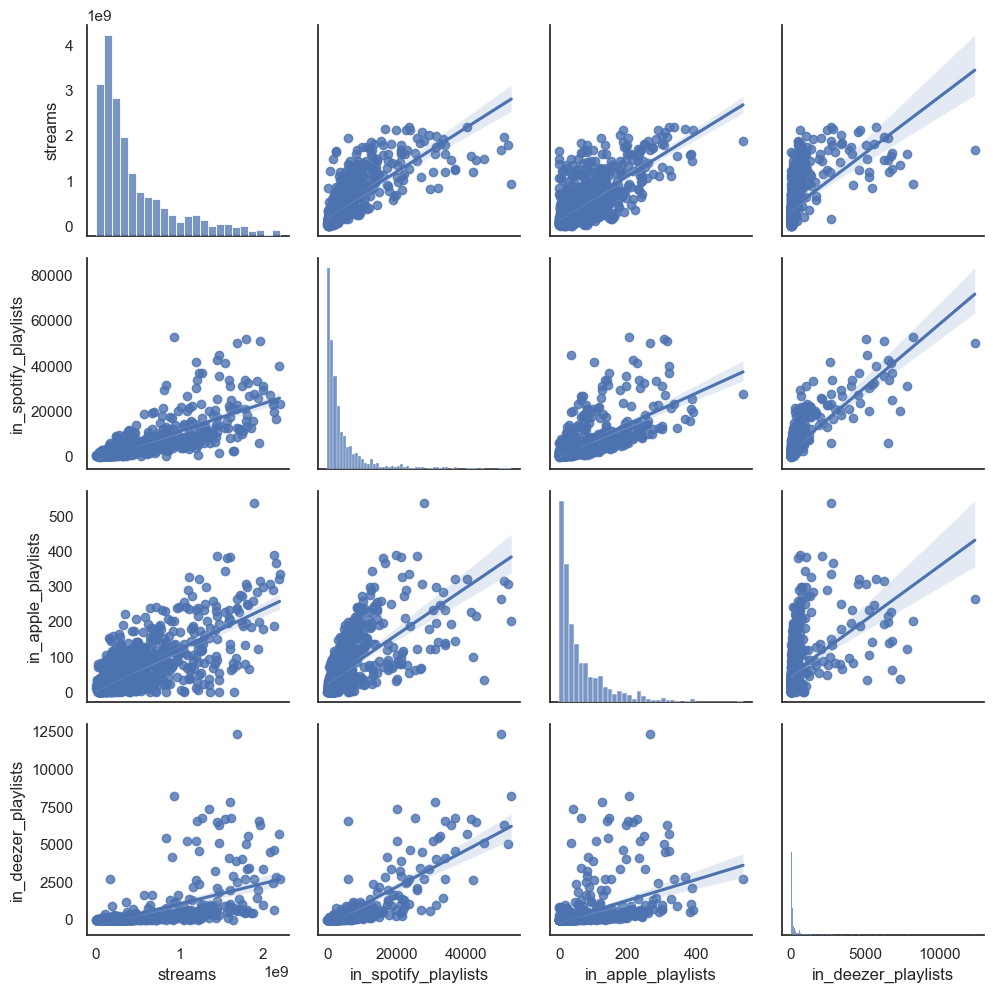

In [15]:
##fig = sns.pairplot(songs, vars=['streams' ,'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists'])

pair_grid = sns.PairGrid(songs, vars=['streams' ,'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists'], 
                         diag_sharey=False)

pair_grid = pair_grid.map_diag(sns.histplot)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.regplot)

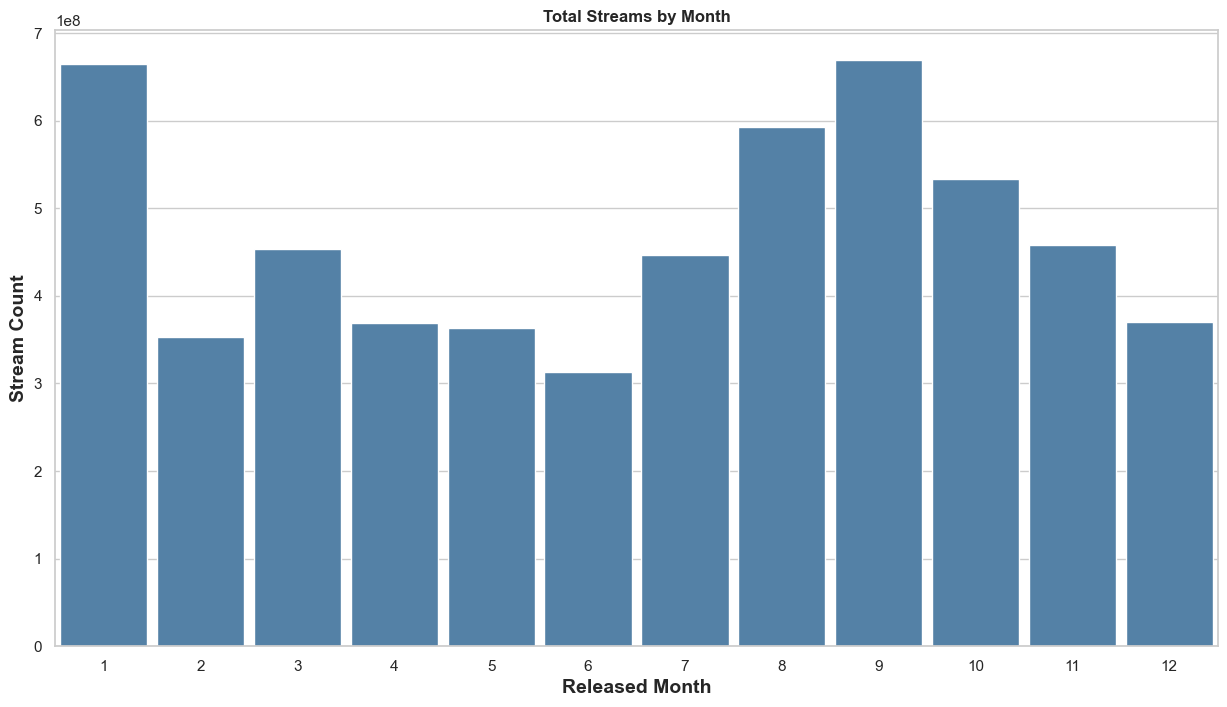

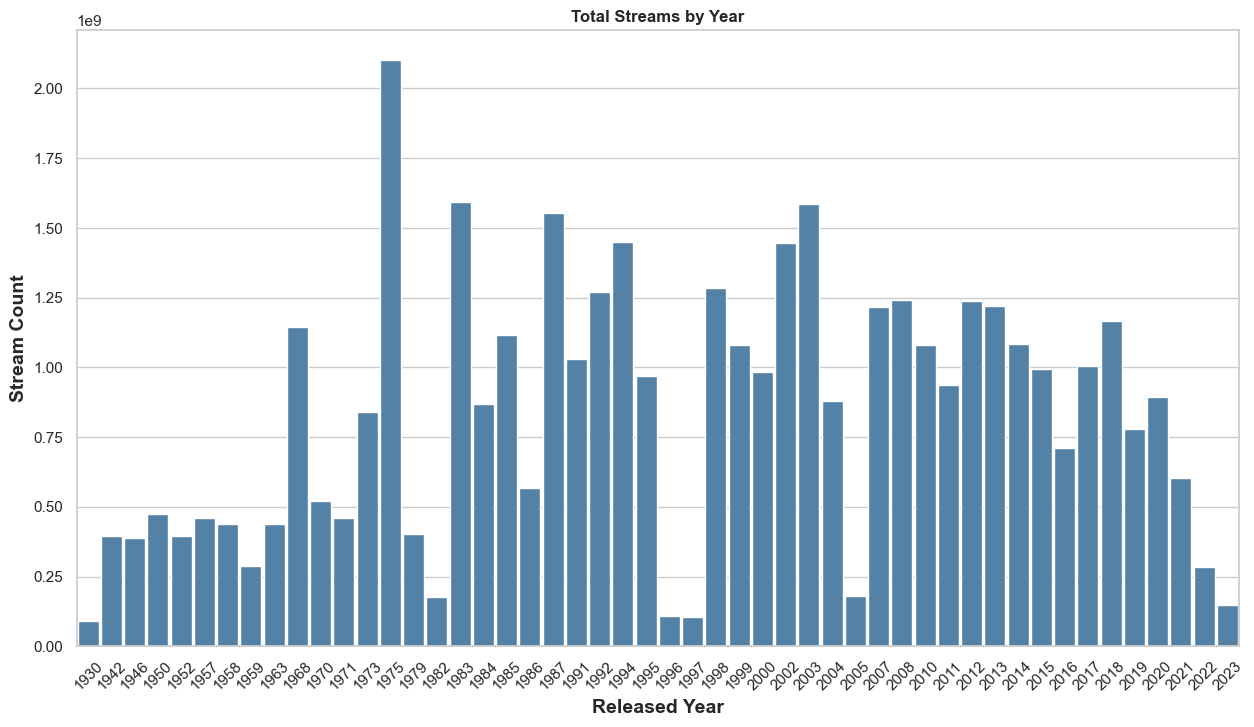

In [16]:
fig_month = plt.figure(figsize=(15, 8))
sns.set(style='whitegrid')




sns.barplot(x='released_month', y='streams', data=songs,width=0.9, errorbar=None, color='steelblue')
plt.xlabel('Released Month',fontsize= 14,fontweight='bold')
plt.ylabel('Stream Count',fontweight='bold', fontsize= 14,)
plt.title('Total Streams by Month',fontsize=12, fontweight='bold')

fig_Year = plt.figure(figsize=(15, 8))
sns.set(style='whitegrid')

sns.barplot(x='released_year', y='streams', data=songs,width=0.9, errorbar=None, color='steelblue')
plt.xlabel('Released Year',fontsize= 14,fontweight='bold')
plt.ylabel('Stream Count',fontweight='bold', fontsize= 14,)
plt.title('Total Streams by Year',fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

## K-Fold Cross Validation

In [17]:
x = songs[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']]
y = songs["streams"]

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.20)

kf = KFold(n_splits=5)

coefs = []
scores = []
RMSE = []
RMAE = []

for trainIndex, testIndex in kf.split(x):
    
    xTrain, xTest = x.iloc[trainIndex], x.iloc[testIndex]
    yTrain, yTest = y.iloc[trainIndex], y.iloc[testIndex]
    
    lr = LinearRegression().fit(xTrain, yTrain)
    
    coefs.append(pd.DataFrame(lr.coef_))
    
    scores.append(lr.score(xTest, yTest))
    
    yPred = lr.predict(xTest)
    RMSE.append(np.sqrt(mean_squared_error(yPred, yTest)))
    RMAE.append(np.sqrt(mean_absolute_error(yPred, yTest)))
    

In [18]:
##print(scores)
##print(RMSE)
##print(RMAE)

print(np.mean(scores))
print(np.mean(RMSE))
print(np.mean(RMAE))
print(coefs)

dfscores = pd.DataFrame(scores, columns = ['R^2'])
dfrmse = pd.DataFrame(RMSE, columns = ['RMSE'])
dfrmae = pd.DataFrame(RMAE, columns = ['RMAE'])

pd.concat([dfscores, dfrmse, dfrmae], axis=1)
##pd.merge(pd.merge(dfscores, dfrmse, on='coefs'), dfrmae, on='coefs')


0.5721709171659984
275457350.11183196
13916.101724937855
[              0
0  3.442589e+04
1  2.531153e+06
2 -3.839547e+04,               0
0  3.308559e+04
1  2.528243e+06
2 -2.701863e+04,               0
0  3.676007e+04
1  2.362059e+06
2 -3.048082e+04,               0
0  4.061007e+04
1  2.000627e+06
2  1.614335e+04,               0
0  3.454717e+04
1  2.457753e+06
2 -2.226741e+04]


,R^2,RMSE,RMAE
0,0.602072,3.599420e+08,15986.961469
1,0.661575,2.220942e+08,12670.646195
2,0.643093,2.730765e+08,14331.136412
3,0.544251,3.436387e+08,14810.845568
4,0.409864,1.785353e+08,11780.918980


In [19]:
model = LinearRegression()

scores = cross_val_score(model, x, y, cv=5)
print(scores)

[0.60207204 0.6615749  0.64309255 0.54425097 0.40986413]


# Highly volatile... so let's try to normalize the columns of data
#### Using a Log Transformation because of the impact of extreme values/outliers, skewness of the attributes, and there are no zero/negative values

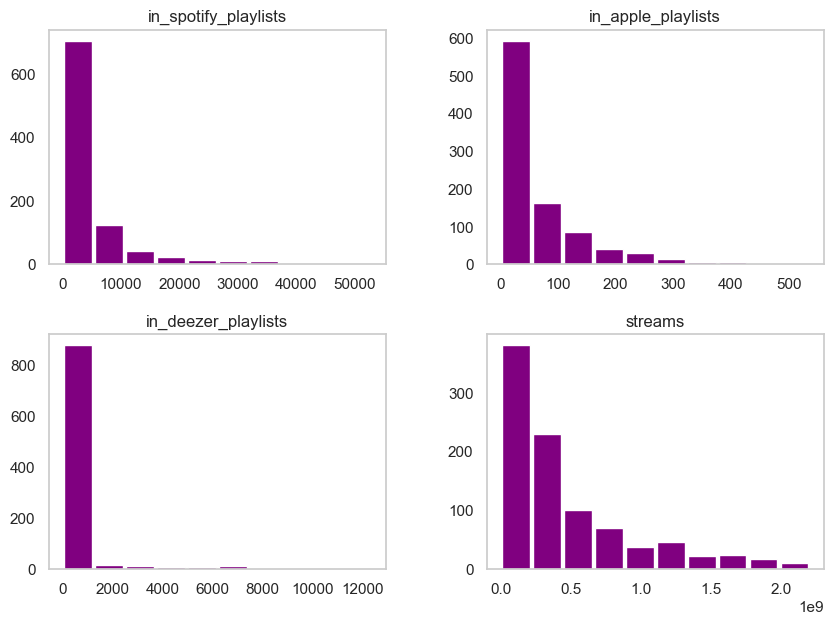

In [20]:
distSongs = songs[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'streams']]
distSongs = distSongs[(distSongs['streams']) > 1]

distSongs.hist(column=distSongs.columns, 
              color='purple', 
              figsize=(10,7), 
              bins=10, 
              rwidth=0.9, 
              grid=False 
             )
plt.show()

## left skewed

In [21]:
n_Songs = songs[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists','streams']]
n_Songs = n_Songs[(n_Songs['streams']) > 1]

normSongs = np.log(n_Songs + 1)
##normSongs = pd.concat([normSongs, songs['streams']], axis=1)
normSongs

##normSongs.nsmallest(30, 'in_deezer_playlists')


,in_spotify_playlists,in_apple_playlists,in_deezer_playlists,streams
0,6.317165,3.784190,3.828641,18.766974
1,7.296413,3.891820,4.077537,18.711231
2,7.242798,4.553877,4.521789,18.757181
3,8.969415,4.762174,4.836282,20.501173
4,8.050065,4.442651,4.477337,19.530023
...,...,...,...,...
948,6.860664,4.127134,3.637586,18.331558
949,7.074117,1.609438,2.197225,18.618481
950,6.352629,1.098612,2.079442,18.112982
951,7.186144,3.401197,2.890372,18.712571


In [22]:
normSongs = normSongs[np.abs(stats.zscore(normSongs['streams'])) < 3]

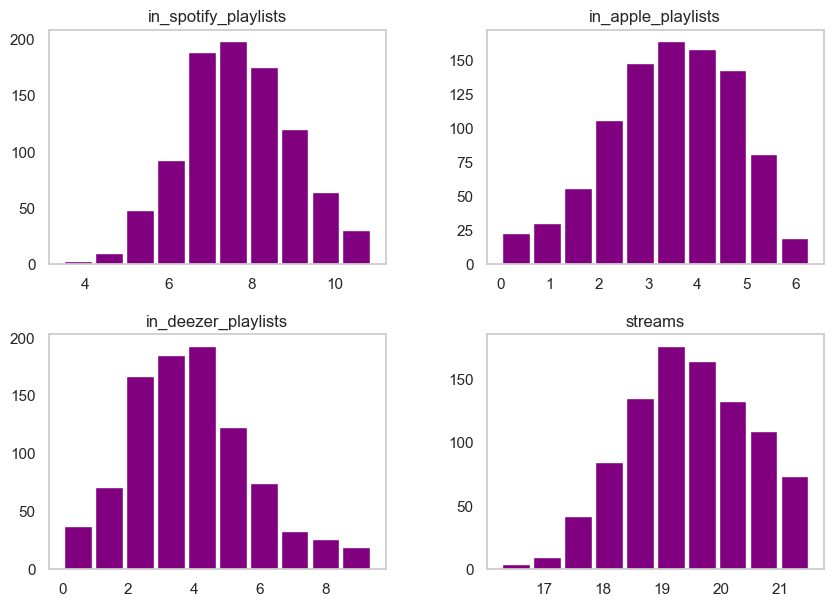

In [23]:
##normDistSongs = normSongs[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'streams']]

normSongs.hist(column=normSongs.columns, 
              color='purple', 
              figsize=(10,7), 
              bins=10, 
              rwidth=0.9, 
              grid=False 
             )
plt.show()

## fixed heavy skewness... more normally distributed

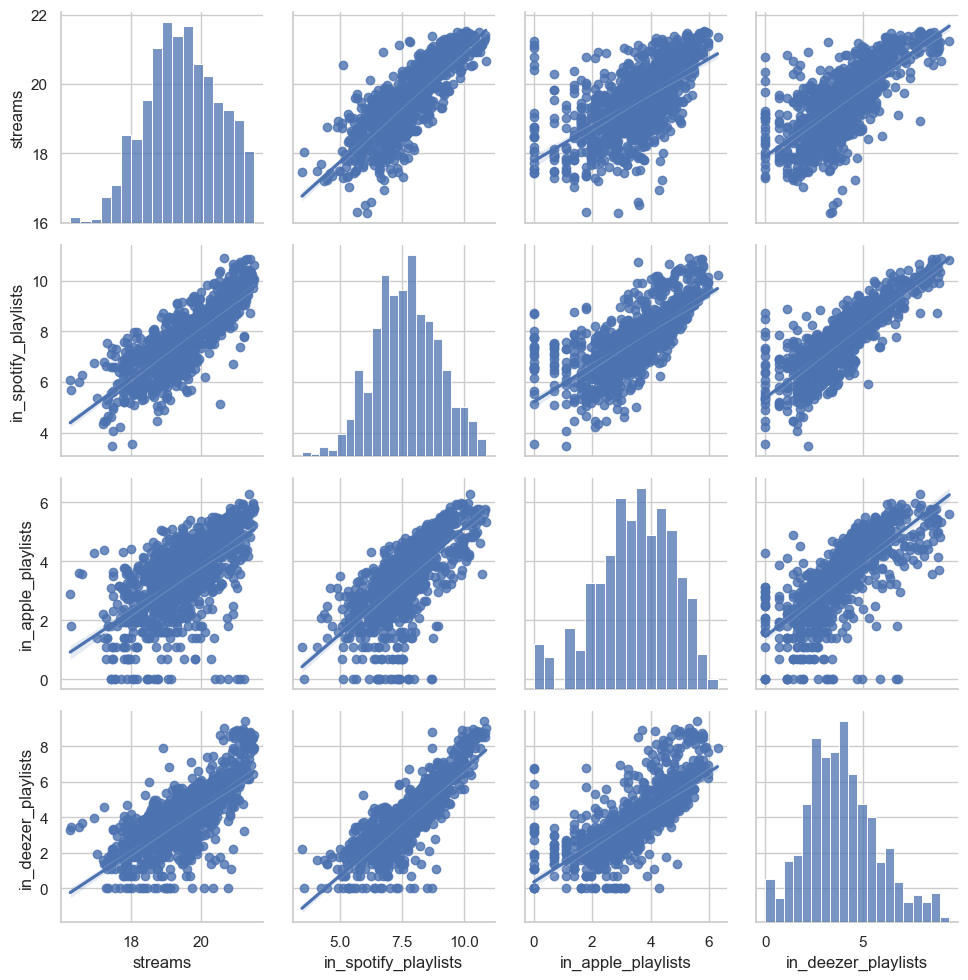

In [24]:
pair_grid_n = sns.PairGrid(normSongs, vars=['streams' ,'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists'], 
                         diag_sharey=False)

pair_grid_n = pair_grid_n.map_diag(sns.histplot)
pair_grid_n = pair_grid_n.map_upper(sns.regplot)
pair_grid_n = pair_grid_n.map_lower(sns.regplot)

## same plot as before, just with log transformed attributes... looks like it fits better!

## Same linear regression k fold fit as before
### this time plotting each of the folds with the predicted model

In [26]:
## using '_n' to differentiate between this model and the previous one... otherwise, steps are the same
## if you'd like to see plots for each kfold, uncomment what I commented out in this cell

x_n = normSongs[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']]
y_n = normSongs["streams"]

xTrain_n, xTest_n, yTrain_n, yTest_n = train_test_split(x_n, y_n, test_size=0.20)

kf = KFold(n_splits=5)

## fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

coefs = []
scores_n = []
RMSE_n = []
RMAE_n = []



## for i, (trainIndex_n, testIndex_n) in enumerate(kf.split(x_n)):
for trainIndex_n, testIndex_n in kf.split(x_n):
    xTrain_n, xTest_n = x_n.iloc[trainIndex_n], x_n.iloc[testIndex_n]
    yTrain_n, yTest_n = y_n.iloc[trainIndex_n], y_n.iloc[testIndex_n]
    
    lr = LinearRegression().fit(xTrain_n, yTrain_n)
    
    coefs.append(pd.DataFrame(lr.coef_))
    
    scores_n.append(lr.score(xTest_n, yTest_n))
    
    yPred_n = lr.predict(xTest_n)
    RMSE_n.append(np.sqrt(mean_squared_error(yPred_n, yTest_n)))
    RMAE_n.append(np.sqrt(mean_absolute_error(yPred_n, yTest_n)))
    
      ##  row, col = i // 3, i % 3
      ##  axs[row, col].scatter(yTest_n, yPred_n)
      ##  axs[row, col].plot([min(yTest_n), max(yTest_n)], [min(yTest_n), max(yTest_n)], linestyle='--', color='red')
      ##  axs[row, col].set_title(f'Fold {i+1}')

##plt.tight_layout()
##plt.show()


## results

In [27]:
##print(scores_n)
##print(RMSE_n)
##print(RMAE_n)

print(np.mean(scores_n))
print(np.mean(RMSE_n))
print(np.mean(RMAE_n))

dfscoreslog = pd.DataFrame(scores_n, columns = ['R^2'])
dfrmselog = pd.DataFrame(RMSE_n, columns = ['RMSE'])
dfrmaelog = pd.DataFrame(RMAE_n, columns = ['RMAE'])

dflog = pd.concat([dfscoreslog, dfrmselog, dfrmaelog], axis=1)
dflog
## Better results!!

0.546734260784967
0.6162111484006072
0.6943030958767652


,R^2,RMSE,RMAE
0,0.654430,0.763740,0.767716
1,0.693804,0.553570,0.659671
2,0.606631,0.589860,0.678899
3,0.665868,0.529639,0.651837
4,0.112938,0.644246,0.713392


In [28]:
model_n = LinearRegression()

scores_n = cross_val_score(model_n, x_n, y_n, cv=5)
print(scores_n)

[0.65443008 0.69380386 0.60663091 0.66586833 0.11293812]


### Residual Plot and predicted/actual plot

plt.scatter(yTest_n, yPred_n)

residuals = yTest_n - yPred_n
plt.scatter(yPred_n, residuals)
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

### Trying a polynomial model

In [29]:
## separate x and y variables

x_n = normSongs[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']]
y_n = normSongs["streams"]   

X_nTrain, X_nTest, Y_nTrain, Y_nTest = train_test_split(x_n, y_n, test_size=0.2)

In [30]:
## Trying to run the same kfold loop while also trying each of the different degree polynomials

kf = KFold(n_splits=5)

coefs = {}
scores = {}
RMSE = {}
RMAE = {}

degs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for degs in degs:
    
    for trainIndex, testIndex in kf.split(x_n):
        
        x_nTrain, x_nTest = x_n.iloc[trainIndex], x_n.iloc[testIndex]
        y_nTrain, y_nTest = y_n.iloc[trainIndex], y_n.iloc[testIndex]
        
        
        poly_model = PolynomialFeatures(degree=degs)

        polyX_train = poly_model.fit_transform(x_nTrain)
        polyX_test = poly_model.transform(x_nTest)

        ##poly_model.fit(polyX, y_n)


        ## fit a linear regression model to the new polynomial features
        regmodel = LinearRegression()
        regmodel.fit(polyX_train, y_nTrain)
        
        coefs[degs] = pd.DataFrame(regmodel.coef_)

        ypred = regmodel.predict(polyX_test)
        ##regmodel.coef_
        
        scores[degs] = regmodel.score(polyX_test, y_nTest)
        RMSE[degs] = np.sqrt(mean_squared_error(ypred, y_nTest))
        RMAE[degs] = np.sqrt(mean_absolute_error(ypred, y_nTest))

In [31]:
df1 = pd.DataFrame(list(scores.items()), columns = ['Degs','R^2'])
df2 = pd.DataFrame(list(RMSE.items()), columns = ['Degs','RMSE'])
df3 = pd.DataFrame(list(RMAE.items()), columns = ['Degs','RMAE'])

pd.merge(pd.merge(df1, df2, on='Degs'), df3, on='Degs')

## Best Results using Degree of 3

,Degs,R^2,RMSE,RMAE
0,1,0.112938,0.644246,0.713392
1,2,0.253516,0.590997,0.686475
2,3,0.281530,0.579801,0.678459
3,4,-1.996362,1.184056,0.926885
4,5,0.029061,0.674017,0.710168
5,6,-0.545757,0.850444,0.744572
6,7,-0.622175,0.871212,0.768523
7,8,-51.851124,4.972813,1.518621
8,9,-193.058405,9.528867,1.574795
9,10,-7116.758165,57.709412,3.705862


In [32]:
## these are the same steps as used in the loop above... just fitting the model to the whole dataset for visual purposes

## transform features into polynomial features

model_degree = 3
polynomial_model = PolynomialFeatures(degree=model_degree)

polyModelX = polynomial_model.fit_transform(x_n)

polynomial_model.fit(polyModelX, y_n)


## fit a linear regression model to the new polynomial features
regularmodel = LinearRegression()
regularmodel.fit(polyModelX, y_n)

poly_ypred = regularmodel.predict(polyModelX)

In [33]:
## convert log transformed columns back to regular values e^log(x)

loginverse_ypred = np.exp(poly_ypred).astype(float)
predictedStreams = pd.DataFrame(loginverse_ypred, columns=['Predicted Streams'])


normSongs_inv = np.exp(normSongs)


predictedStreams

,Predicted Streams
0,6.722021e+07
1,2.016174e+08
2,1.427049e+08
3,7.151638e+08
4,3.569822e+08
...,...
923,1.237815e+08
924,1.449136e+08
925,1.103570e+08
926,1.997201e+08


In [34]:
## needed to do some adjustments since I used a log(x+1)... disregard if the data is the same as original 'songs' df

#normSongs_inv['in_spotify_playlists'] = normSongs_inv['in_spotify_playlists'] + 1
#normSongs_inv['in_apple_playlists'] = normSongs_inv['in_apple_playlists'] - 1
#normSongs_inv['in_deezer_playlists'] = normSongs_inv['in_deezer_playlists'] - 1

In [35]:
## combine prediction values with original values

predictedStreams.reset_index(drop=True, inplace=True)
normSongs_inv.reset_index(drop=True, inplace=True)

finalSongs = pd.concat([predictedStreams, normSongs_inv], axis=1)

finalSongs

,Predicted Streams,in_spotify_playlists,in_apple_playlists,in_deezer_playlists,streams
0,6.722021e+07,554.0,44.0,46.0,141381704.0
1,2.016174e+08,1475.0,49.0,59.0,133716287.0
2,1.427049e+08,1398.0,95.0,92.0,140003975.0
3,7.151638e+08,7859.0,117.0,126.0,800840818.0
4,3.569822e+08,3134.0,85.0,88.0,303236323.0
...,...,...,...,...,...
923,1.237815e+08,954.0,62.0,38.0,91473364.0
924,1.449136e+08,1181.0,5.0,9.0,121871871.0
925,1.103570e+08,574.0,3.0,8.0,73513684.0
926,1.997201e+08,1321.0,30.0,18.0,133895613.0


In [36]:
residuals = (finalSongs['Predicted Streams'] - finalSongs['streams']).mean()
residuals


RMSE_final = np.sqrt(mean_squared_error(finalSongs['Predicted Streams'], finalSongs['streams']))
print(RMSE_final)

RMAE_final = np.sqrt(mean_absolute_error(finalSongs['Predicted Streams'], finalSongs['streams']))
print(RMAE_final)

231939587.46680218
12395.004316257564


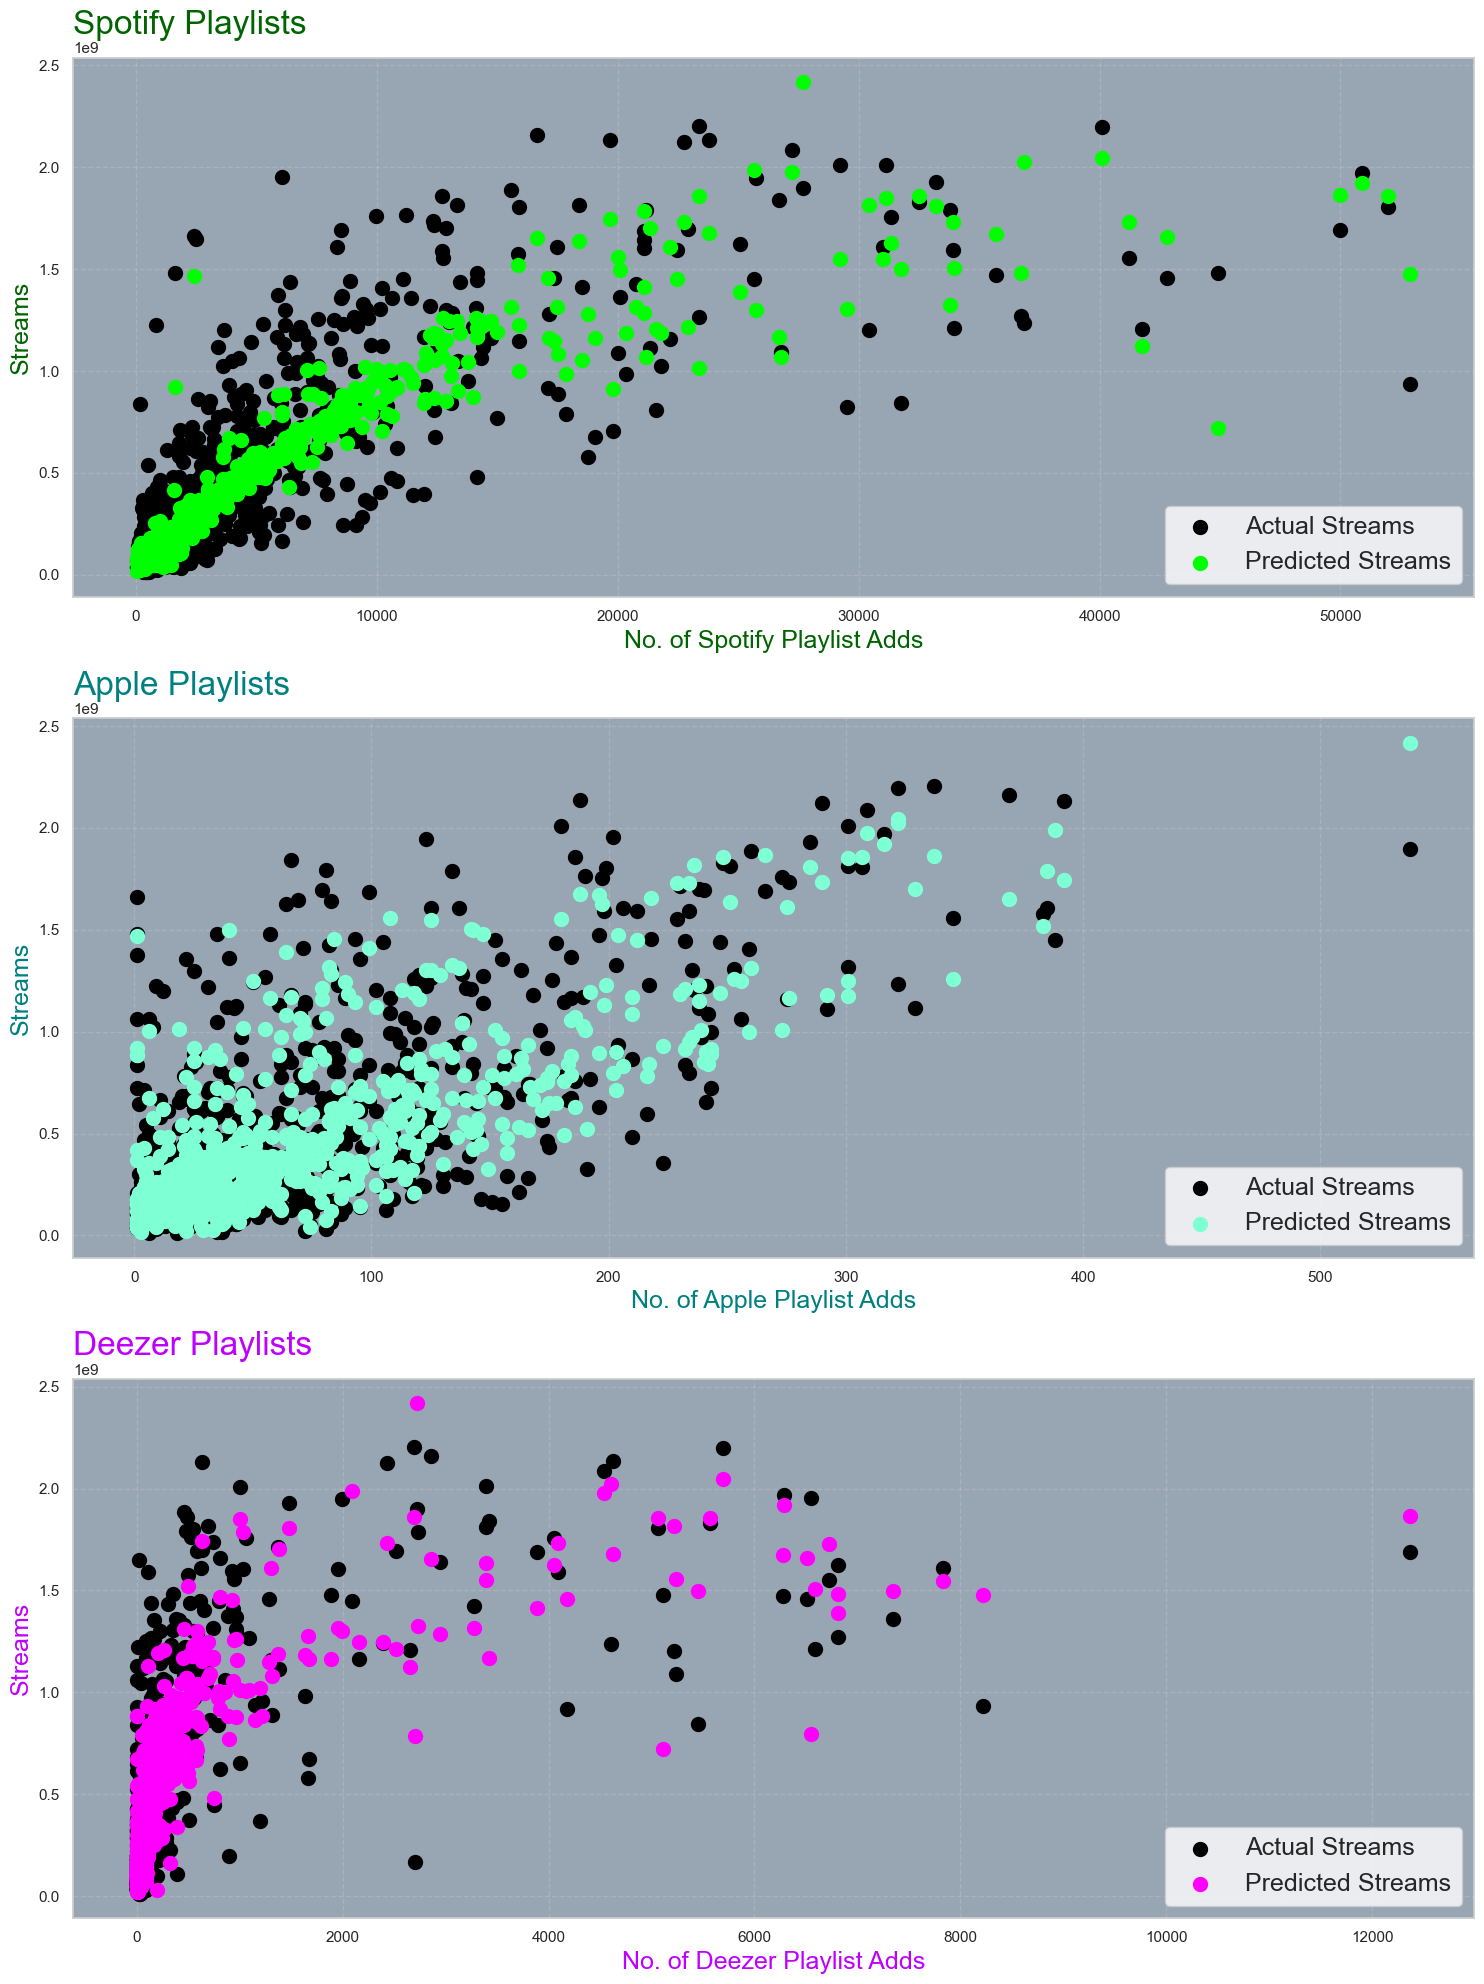

In [37]:
## plotting Actual vs. Predicted for each of the playlist attributes

fig = plt.figure(figsize=(15, 20))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)


## Spotify plot
ax1.scatter(finalSongs['in_spotify_playlists'], finalSongs['streams'], color='black', linewidth=5, label='Actual Streams')
ax1.scatter(finalSongs['in_spotify_playlists'], finalSongs['Predicted Streams'], color='#00FF00', linewidth=5, alpha=1, label = 'Predicted Streams')
ax1.set_title("Spotify Playlists", fontsize=24, color='#006400', loc='left')
ax1.set_xlabel("No. of Spotify Playlist Adds", fontsize=18, color='#006400')
ax1.set_ylabel("Streams", fontsize =18, color='#006400')
ax1.legend(fontsize=18, frameon=True, loc='lower right')
ax1.grid(True, linestyle='--', alpha=0.33)
ax1.set_facecolor((0.2, 0.3, 0.4, 0.5))

## Apple plot
ax2.scatter(finalSongs['in_apple_playlists'], finalSongs['streams'], color='black', linewidth=5, label='Actual Streams')
ax2.scatter(finalSongs['in_apple_playlists'], finalSongs['Predicted Streams'], color='#7FFFD4', linewidth=5, alpha=1, label = 'Predicted Streams')
ax2.set_title("Apple Playlists", fontsize=24, color='#008080', loc='left')
ax2.set_xlabel("No. of Apple Playlist Adds", fontsize=18, color='#008080')
ax2.set_ylabel("Streams", fontsize =18, color='#008080')
ax2.legend(fontsize=18, frameon=True, loc='lower right')
ax2.grid(True, linestyle='--', alpha=0.33)
ax2.set_facecolor((0.2, 0.3, 0.4, 0.5))

## Deezer plot
ax3.scatter(finalSongs['in_deezer_playlists'], finalSongs['streams'], color='black', linewidth=5, label='Actual Streams')
ax3.scatter(finalSongs['in_deezer_playlists'], finalSongs['Predicted Streams'], color='#FF00FF', linewidth=5, alpha=1, label = 'Predicted Streams')
ax3.set_title("Deezer Playlists", fontsize=24, color='#BF00FF', loc='left')
ax3.set_xlabel("No. of Deezer Playlist Adds", fontsize=18, color='#BF00FF')
ax3.set_ylabel("Streams", fontsize =18, color='#BF00FF')
ax3.legend(fontsize=18, frameon=True, loc='lower right')
ax3.grid(True, linestyle='--', alpha=0.33)
ax3.set_facecolor((0.2, 0.3, 0.4, 0.5))

fig.tight_layout()
plt.show()